In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
np.random.seed(42)
n_samples= 1000
# Alternatives
alt = ['Concrete', 'Concrete Block', 'Wooden-Framed']
lca_results = {
    'Concrete': np.random.normal(100, 10, n_samples),
    'Concrete Block': np.random.normal(90, 15, n_samples),
    'Wooden-Framed': np.random.normal(80, 20, n_samples)  
}

df = pd.DataFrame(lca_results)

In [55]:
df.size

3000

In [56]:
#Discernability Analysis 
def DA(df,a1,a2):
    return np.mean(df[a1]-df[a2]<0)


In [57]:
da_results={}

for i in range(len(alt)):
    for j in range(i+1, len(alt)):
        alt1, alt2= alt[i], alt[j]
        prob = DA(df, alt1,alt2)
        da_results[f"{alt1} vs {alt2}"]=prob

print("Discernibility Analysis (DA) Results:")
for comparison, prob in da_results.items():
    print(f"{comparison}: {prob:.2%}")

Discernibility Analysis (DA) Results:
Concrete vs Concrete Block: 31.90%
Concrete vs Wooden-Framed: 18.30%
Concrete Block vs Wooden-Framed: 32.50%


In [58]:
da_matrix = np.zeros((len(alt),len(alt)))


for i in range(len(alt)):
   for j in range(len(alt)):
      if i != j:
          da_matrix[i,j]= DA(df , alt[i],alt[j])
da_matrix

array([[0.   , 0.319, 0.183],
       [0.681, 0.   , 0.325],
       [0.817, 0.675, 0.   ]])

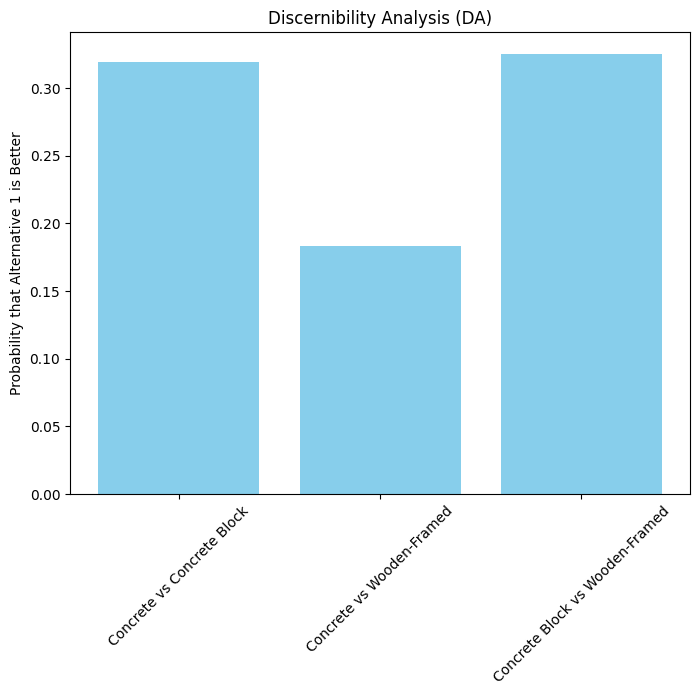

In [59]:
plt.figure(figsize=(8,6))
plt.bar(da_results.keys(), da_results.values(), color='skyblue')
plt.title("Discernibility Analysis (DA)")
plt.ylabel("Probability that Alternative 1 is Better")
plt.xticks(rotation=45)
plt.show()